# Machine Learning

## 1. Basics on supervised learning and optimization  

#### Interesting links:  
* __[Keras: code examples](https://keras.io/examples/)__  
* __[Loss functions](https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9)__  
* __[Gradient descent](https://medium.com/towards-data-science/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)__ 

### 1.1 Supervised learning

**Supervised Learning**: we have *labelled* data on which we can train a classifier (for instance).  
* 1) Learn a **representation** of the input data: vectors $x_{i}$  
* 2) **Train a classifier** on this data: a function $f$ that takes $x_{i}$ as an input and gives $class(x_{i})=y_{i}$ as an output. In order to do so, we minimize the difference between the predictions of the model and the real labels of the training set: the **loss**.  

> NB: Compromise between **predictive power** of $f$ and its **complexity** (we want to be able to **generalize** well)  
> * There exist **multiple Loss functions**: __[read more](https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9)__ + complete with slides of Lecture1a. 

* 3) Use the produced classifier on **new examples**  

### 1.2 Numerical optimization

**Optimization** = the process of choosing the best classifying function $f$ among the multiple possible ones.  
* **Convexity**: $f(\lambda x_{1}+(1-\lambda) x_{2}) \le  \lambda f(x_{1}) + (1-\lambda)f(x_{2})$      
* **Smoothness** ($C^{n}$ functions): differentiable up to $n^{th}$ order (hence continuous)  


Finding local or global extrema of $f$ is equivalent to finding $x$ such that $\nabla f(x)=0$ (**gradient**), where $x$ is the set of *parameters* that we wish to optimize.  
$\rightarrow$ usually, we represent in 2D, but ofc, multiple parameters (gradient and not simply derivative).

* **learning-rate** = the step by which we move after each computation of the gradient. It can be *fixed* once and for all, or *decaying*. 


### 1.3 Linear regression

**Linear regression** = the modeling of a variable as a *linear* function of others.  

* **Observations**: a set of $(x_{i}, y_{i}), 1 \le i \le n$, such that every $x_{i} = (x_{i1}, ... , x_{ip})$ is a $p$-dimensional vector.  
* **Model**: $y = f_{\beta}(x) = \beta_{1}x_{1} + ... + \beta_{p}x_{p}$, so we look for the unknown optimal $(\beta_{1}, ... , \beta_{p})$  

> The **error** for a given observation $i$ is $\epsilon_{i} = y_{i} - f_{\beta}(x_{i})$.


## Practical Session 1  
We consider $f(x_{1},x_{2})=(x_{1}²+x_{2}²)\cdot(cos(x_{1})+sin(x_{2}))$

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
x1_min, x1_max = -10, 10
x2_min, x2_max = -10, 10
N_points = 100

def f(x1,x2):
    return (x1**2+x2**2)*(np.cos(x1)+np.sin(x2))

def gradient_f(x1,x2):
    """Computing the gradient from partial derivatives"""
    grad1 = 2*x1*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(-np.sin(x1))
    grad2 = 2*x2*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(np.cos(x2))
    return np.array([grad1, grad2])

# meshgrid: returns coordinate matrix from coordinate vectors
x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,N_points), np.linspace(x2_min,x2_max,N_points))

<IPython.core.display.Javascript object>


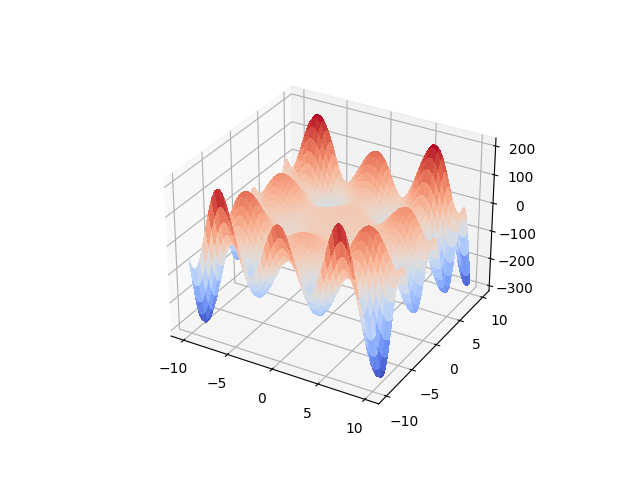

In [16]:
y = f(*np.array([x1,x2]))
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
# Tracer une figure 3d
ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

$f$ is not convex, but seems smooth. Many local extrema.

In [9]:
# Implementing the Gradient Descent
def GD_alg(f, grad_f, x0, mu, K, verbose = True):
    '''
    Implementation of the Gradient Descent (GD) algorithm.
    - f: the function to minimize 
    - grad_f: the gradient function 
    - x0: initial parameters
    - mu: learning rate
    - K: number of iterations
    '''
    x = x0.copy() 
    f_values = []
    grad_f_norm = []
    
    for k in range(K):
        f_values.append(f(*x)) # cost values
        grad_f_x = grad_f(*x) # gradient values
        grad_f_x_norm = np.linalg.norm(grad_f_x) # norm of the gradient vector
        grad_f_norm.append(grad_f_x_norm) 
        
        x = x - mu*grad_f_x # GD iteration
        
        if k%20==0 and verbose:
            print('Iteration: {}/{} --- Cost: {:0.3f} --- Gradient norm: {:0.3f} --- x: ({:.3f},{:.3f})\n'.format(k,K,f(*x),grad_f_x_norm,x[0],x[1]))
    if verbose:
        print(f"Final output (initialized {x0} with mu={mu}):\n * Optimal parameters = {x}\n * Cost = {f_values[-1]}\n * Gradient Norm = {grad_f_norm[-1]}\n")
        
    return x, np.array(f_values), np.array(grad_f_norm)

In [10]:
### A first run of the Gradient Descent 
x0 = np.array([0.5,0.5]) # initialization
mu = 0.05 # learning rate -> each parameter will be changed with steps of size mu
K = 100 # nb of iterations

x, f_values, grad_f_norm = GD_alg(f, gradient_f, x0, mu, K)

Iteration: 0/100 --- Cost: 0.476 --- Gradient norm: 2.115 --- x: (0.444,0.410)

Iteration: 20/100 --- Cost: 0.003 --- Gradient norm: 0.122 --- x: (0.046,0.025)

Iteration: 40/100 --- Cost: 0.000 --- Gradient norm: 0.014 --- x: (0.005,0.003)

Iteration: 60/100 --- Cost: 0.000 --- Gradient norm: 0.002 --- x: (0.001,0.000)

Iteration: 80/100 --- Cost: 0.000 --- Gradient norm: 0.000 --- x: (0.000,0.000)

Final output (initialized [0.5 0.5] with mu=0.05):
 * Optimal parameters = [1.08940642e-05 5.63181875e-06]
 * Cost = 1.8567811429964293e-10
 * Gradient Norm = 2.725292190300842e-05



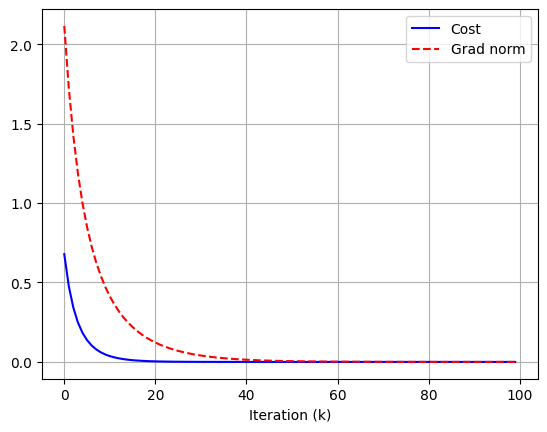

In [11]:
# Seeing what happened during the iterations
%matplotlib inline
plt.plot(range(K), f_values, 'b', label='Cost')
plt.plot(range(K), grad_f_norm, '--r', label='Grad norm')
plt.legend()
plt.xlabel('Iteration (k)', fontsize = 10)
plt.grid()

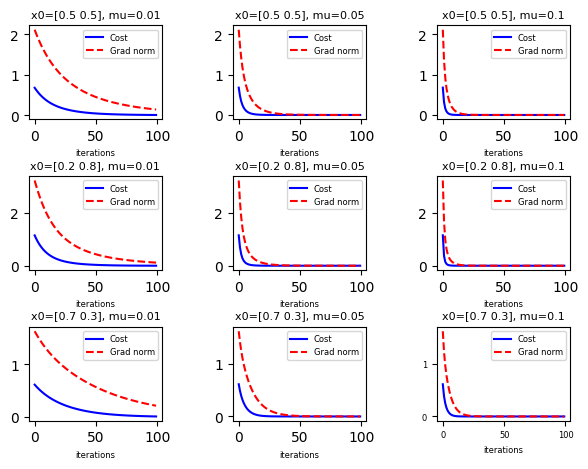

In [12]:
# Comparing the performance with different initialization paramters and mu values
x0_values = [np.array([0.5, 0.5]), np.array([0.2, 0.8]), np.array([0.7, 0.3])]
mu_values = [0.01, 0.05, 0.1]
K = 100

fig, axs = plt.subplots(len(x0_values), len(mu_values))
fig.tight_layout(pad = 2.0)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

for i, x0 in enumerate(x0_values):
    for j, mu in enumerate(mu_values):
        x, f_values, grad_f_norm = GD_alg(f, gradient_f, x0, mu, K, verbose = False)
        axs[i,j].plot(range(K), f_values, 'b', label='Cost')
        axs[i,j].plot(range(K),grad_f_norm, '--r', label='Grad norm')
        axs[i,j].legend(loc="best", fontsize=6)
        axs[i,j].set_title(f"x0={x0}, mu={mu}", size=8)
        axs[i,j].set_xlabel('iterations', fontsize = 6)
        #axs[i,j].set_xticklabels(labels=["0","50","100"], fontsize=6)
        axs[i,j].set_ylabel('', fontsize = 6)
        #axs[i,j].set_yticklabels(labels=["0","1","2"], fontsize=6)
        
#plt.show()

## Practical Session 2

In [13]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
# Import and preprocess data
df = pd.read_csv("Hitters.csv")
df_clean = df.dropna()
df_clean.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A

In [15]:
# Transformation of categorical values into indicators
X = pd.get_dummies(data = df_clean, columns=["League", "Division", "NewLeague"])
X.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  ...  \
1    315    81      7    24   38     39     14    3449    835      69  ...   
2    479   130     18    66   72     76      3    1624    457      63  ...   
3    496   141     20    65   78     37     11    5628   1575     225  ...   
4    321    87     10    39   42     30      2     396    101      12  ...   
5    594   169      4    74   51     35     11    4408   1133      19  ...   

   PutOuts  Assists  Errors  Salary  League_A  League_N  Division_E  \
1      632       43      10   475.0         0         1           0   
2      880       82      14   480.0         1         0           0   
3      200       11       3   500.0         0         1           1   
4      805       40       4    91.5         0         1           1   
5      282      421      25   750.0         1         0           0   

   Division_W  NewLeague_A  NewLeague_N  
1           1            0            1  
2           1            1            0  
3           0            0            1  
4           0            0            1  
5           1            1            0  

[5 rows x 23 columns]

In [19]:
# Split into training and test set
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)
y_train, y_test = X_train.Salary, X_test.Salary
#X_train, X_test = X_train.drop("Salary", axis=1), X_test.drop("Salary", axis=1)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
OLS = LinearRegression()
OLS.fit(X_train, y_train)
print(pd.Series(OLS.coef_, index= X.columns))

AtBat          2.760433e-15
Hits          -1.126876e-14
HmRun          8.843187e-15
Runs           7.251144e-15
RBI           -1.356554e-15
Walks         -5.337744e-15
Years         -1.029774e-14
CAtBat        -3.219647e-15
CHits         -9.714451e-17
CHmRun        -4.961309e-16
CRuns         -2.844947e-16
CRBI           2.706169e-16
CWalks        -6.522560e-16
PutOuts        9.714451e-17
Assists        6.522560e-16
Errors        -2.753440e-15
Salary         1.000000e+00
League_A       1.035280e-14
League_N      -1.035303e-14
Division_E     6.662853e-15
Division_W    -6.662311e-15
NewLeague_A    1.357977e-14
NewLeague_N   -1.357950e-14
dtype: float64


## 2. Binary classification

Le **perceptron** est un **algorithme d'apprentissage supervisé de classifieurs binaires** (c'est-à-dire séparant deux classes). Il a été inventé en 1957 par Frank Rosenblatt au laboratoire d'aéronautique de l'université Cornell. Il s'agit d'un neurone formel muni d'une règle d'apprentissage qui permet de déterminer automatiquement les poids synaptiques de manière à séparer un problème d'apprentissage supervisé. Si le problème est linéairement séparable, un théorème assure que la règle du perceptron permet de trouver une séparatrice entre les deux classes.  (__[Read about perceptron](https://fr.wikipedia.org/wiki/Perceptron)__)    
![](img/perceptron.png)  
*NB: Constant is for the bias*

## Practical Session 3

In [5]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

OSError: /home/clementinebleuze/.local/lib/python3.9/site-packages/tensorflow/python/platform/../../core/platform/_cpu_feature_guard.so: cannot open shared object file: No such file or directory